# **Let's Grow More  (LGMVIP) - "DATA SCIENCE INTERN"**
# **LGMVIP JUNE 2023**

# **Author - Shivam Gupta**

# **Beginner Level Task**

# **TASK - 2 --> Stock Market Prediction And Forecast Using Stacked LSTM ML Project :**

Importing Libraries -->

In [1]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM
from sklearn.metrics import mean_squared_error


In [2]:
dataset = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'

In [3]:
df= pd.read_csv(dataset, parse_dates=True,)
df.reset_index()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...,...
2030,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [4]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [5]:
df.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [6]:
df.sample(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
352,2017-05-02,154.30,161.45,153.75,157.50,157.70,6827849,10835.58
167,2018-01-24,306.00,310.70,302.80,303.70,304.25,2154759,6585.37
498,2016-09-27,140.90,146.40,140.55,146.25,144.55,3316650,4746.09
300,2017-07-14,175.90,175.90,172.05,174.25,174.20,2831387,4932.13
653,2016-02-09,123.00,124.40,120.10,121.25,120.75,1109232,1349.00
1368,2013-03-15,134.35,136.60,132.45,132.75,133.40,2951545,3973.40
1288,2013-07-11,149.90,150.90,146.60,147.90,147.65,2026285,3009.66
964,2014-11-10,161.05,162.60,157.25,157.65,157.75,1570697,2497.12
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
215,2017-11-16,254.00,254.65,247.20,251.25,251.95,6292626,15781.35


In [7]:
print(df.to_string())

            Date    Open    High     Low    Last   Close  Total Trade Quantity  Turnover (Lacs)
0     2018-09-28  234.05  235.95  230.20  233.50  233.75               3069914          7162.35
1     2018-09-27  234.55  236.80  231.10  233.80  233.25               5082859         11859.95
2     2018-09-26  240.00  240.00  232.50  235.00  234.25               2240909          5248.60
3     2018-09-25  233.30  236.75  232.00  236.25  236.10               2349368          5503.90
4     2018-09-24  233.55  239.20  230.75  234.00  233.30               3423509          7999.55
5     2018-09-21  235.00  237.00  227.95  233.75  234.60               5395319         12589.59
6     2018-09-19  235.95  237.20  233.45  234.60  234.90               1362058          3202.78
7     2018-09-18  237.90  239.25  233.50  235.50  235.05               2614794          6163.70
8     2018-09-17  233.15  238.00  230.25  236.40  236.60               3170894          7445.41
9     2018-09-14  223.45  236.70  223.30

In [8]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [10]:
df.shape

(2035, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [12]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [13]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [14]:
df1=df.reset_index()['Close']
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

# **Data Visualisation -->**

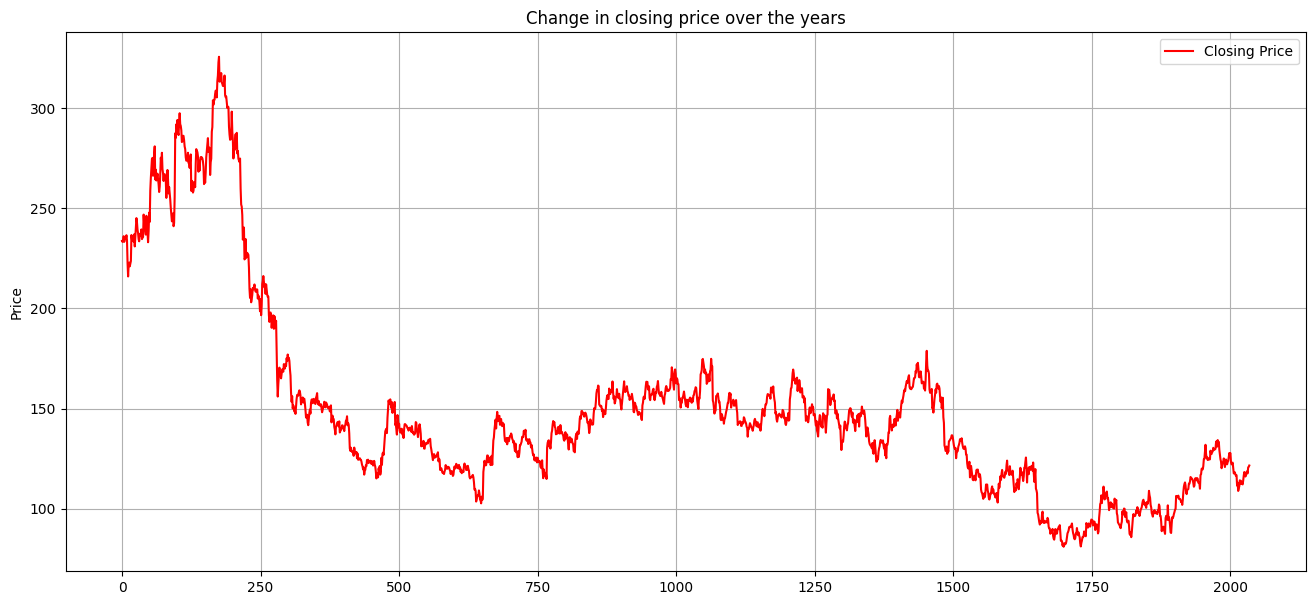

In [15]:
plt.figure(figsize=(10,6))
df['Close'].plot(kind='line',figsize=(16,7),color='r',label="Closing Price")

plt.ylabel("Price")
plt.legend(loc="upper right")
plt.title("Change in closing price over the years")
plt.grid()

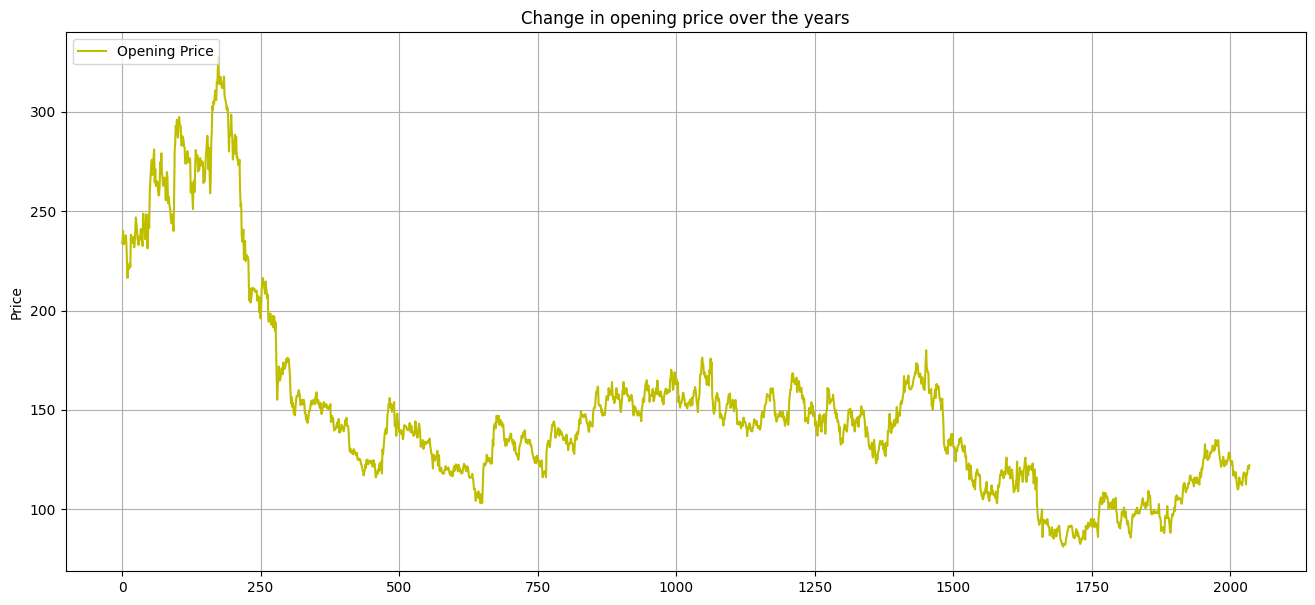

In [16]:
plt.figure(figsize=(10,6))
df['Open'].plot(kind='line',figsize=(16,7),color='y',label="Opening Price")

plt.ylabel("Price")
plt.legend(loc="upper left")
plt.title("Change in opening price over the years")
plt.grid()


<ipython-input-17-146f16eb7eae>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='BuPu')


<Axes: >

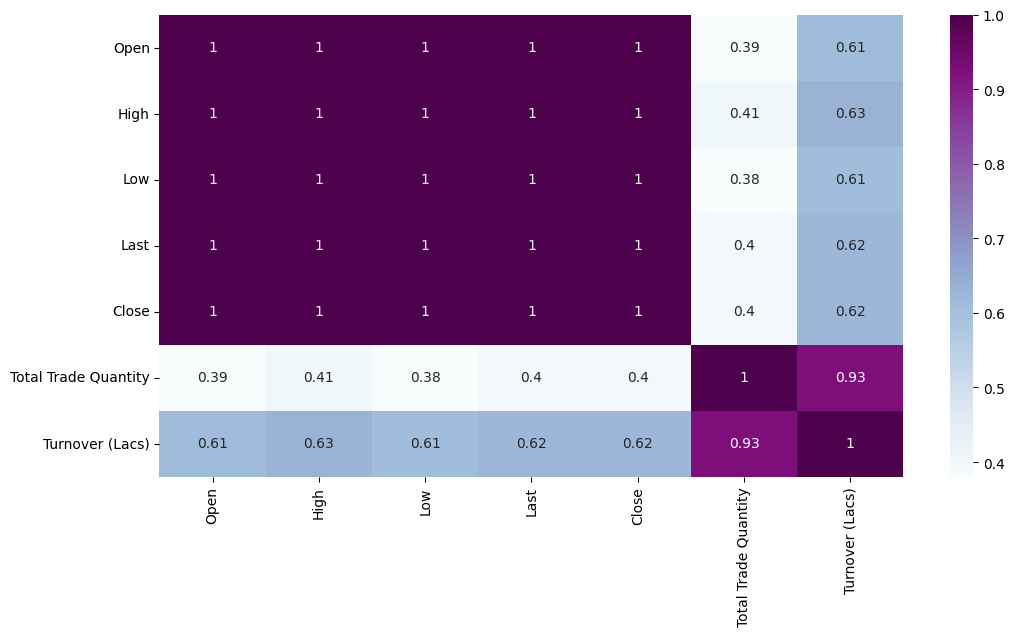

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='BuPu')

<Axes: ylabel='Turnover (Lacs)'>

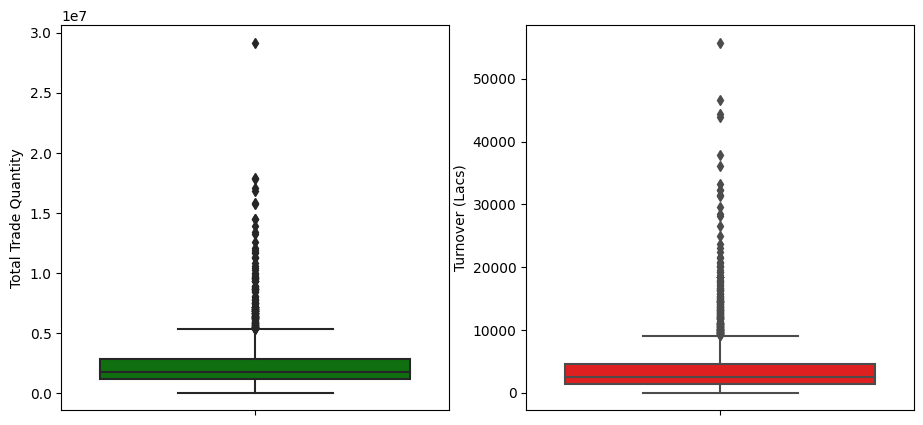

In [18]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,y='Total Trade Quantity',color='green')
plt.subplot(1,2,2)
sns.boxplot(data=df,y='Turnover (Lacs)',color='red')

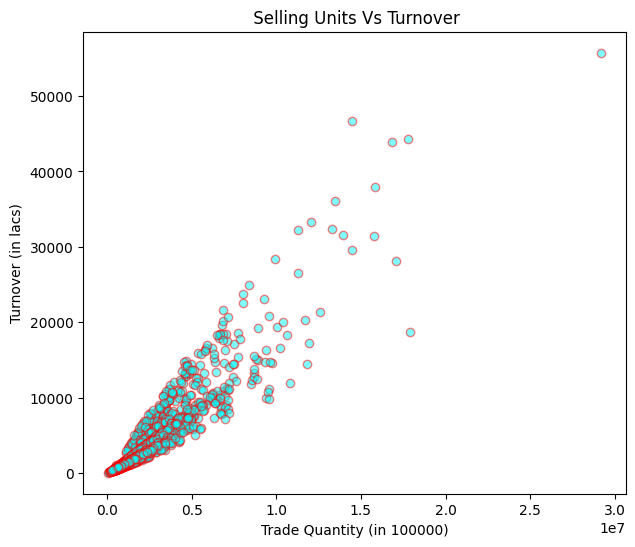

In [19]:
fig=plt.figure(figsize=(7,6))
plt.scatter(df['Total Trade Quantity'],df['Turnover (Lacs)'], alpha=0.5, edgecolor='r', color='cyan')
plt.xlabel("Trade Quantity (in 100000)")
plt.ylabel("Turnover (in lacs)")
plt.title(" Selling Units Vs Turnover")
plt.show()

#**Building Model , Training and Testing -->**

In [20]:
training_set= df[['Open']]
training_set=pd.DataFrame(training_set)
training_set

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55
...,...
2030,117.60
2031,120.10
2032,121.80
2033,120.30


In [21]:
scaler=MinMaxScaler(feature_range=(0,1))
training_set_scaler=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [22]:
training_set_scaler

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [23]:
train_size1= int(len(training_set_scaler)*0.65)
test_size1=int(len(training_set_scaler))-train_size1
train_data1,test_data1=training_set_scaler[0:train_size1,:],training_set_scaler[train_size1:len(df),:1]

In [24]:
train_size1

1322

In [25]:
def create_dataset(dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [26]:
time_step=100
x_train, y_train=create_dataset(train_data1, time_step)
x_test, y_test= create_dataset(test_data1, time_step)

In [27]:
print(x_train.shape,y_train.shape)

(1221, 100) (1221,)


In [28]:
x_test.shape

(612, 100)

In [29]:
y_test.shape

(612,)

In [30]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [31]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics='acc')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 80, batch_size = 64, verbose = 1)


Epoch 1/80
20/20 [==============================] - 16s 296ms/step - loss: 0.0342 - acc: 0.0000e+00 - val_loss: 0.0044 - val_acc: 0.0016
Epoch 2/80
20/20 [==============================] - 5s 224ms/step - loss: 0.0032 - acc: 8.1900e-04 - val_loss: 0.0016 - val_acc: 0.0016
Epoch 3/80
20/20 [==============================] - 4s 204ms/step - loss: 0.0023 - acc: 8.1900e-04 - val_loss: 0.0013 - val_acc: 0.0016
Epoch 4/80
20/20 [==============================] - 4s 223ms/step - loss: 0.0016 - acc: 8.1900e-04 - val_loss: 0.0013 - val_acc: 0.0016
Epoch 5/80
20/20 [==============================] - 4s 216ms/step - loss: 0.0015 - acc: 8.1900e-04 - val_loss: 0.0012 - val_acc: 0.0016
Epoch 6/80
20/20 [==============================] - 4s 197ms/step - loss: 0.0015 - acc: 8.1900e-04 - val_loss: 0.0012 - val_acc: 0.0016
Epoch 7/80
20/20 [==============================] - 5s 245ms/step - loss: 0.0014 - acc: 8.1900e-04 - val_loss: 0.0013 - val_acc: 0.0016
Epoch 8/80
20/20 [=============================

In [34]:
train_predict1=model.predict(x_train)
test_predict1=model.predict(x_test)

train_predict1=scaler.inverse_transform(train_predict1)
test_predict1=scaler.inverse_transform(test_predict1)

20/20 [==============================] - 1s 59ms/step


In [35]:
# Mean Squared Error of training data -->
math.sqrt(mean_squared_error(y_train,train_predict1))

164.9833997799895

In [36]:
# Mean Squared Error of testing data -->
math.sqrt(mean_squared_error(y_test,test_predict1))

116.17657646375764

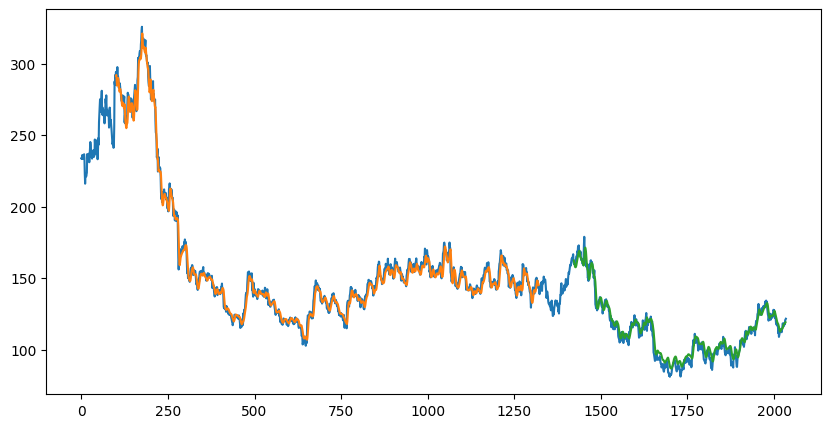

In [37]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(training_set_scaler)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict1)+look_back, :] = train_predict1

# shift test predictions for plotting
testPredictPlot = np.empty_like(training_set_scaler)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict1)+(look_back*2)+1:len(df1)-1, :] = test_predict1

# plot baseline and predictions
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(training_set_scaler))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# THANK YOU!!:)